# Introduction to Social Network Analysis with Python
## [Russell J. Funk](http://www.russellfunk.org)

This tutorial will walk you through the basics of social network analysis with Python. Although our focus will be on social networks, the tools and techniques we'll learn about can be used for all sorts of relational data, from citations among documents and co-occurring words to drug-drug interactions. Here's a quick road map with some of the things we'll discuss.

## Agenda
* Why Python?
* Package landscape
* "Hello, World!"
* Plotting
* Relational data
* On to real data!
* Characterizing nodes
* Characterizing whole networks
* Comparing across whole networks
* Next steps

## Why Python?

People have been using computers to study social networks for a long time, and so there are a lot of different software options available. If you're just getting started with social network analysis (or even if you've been studying networks for a long time), there are a few reasons why I recommend you consider using Python (or adding Python to your toolbox).

* __Community.__ Python is one of the most popular programming languages. That means there's a big community of developers who are regularly creating both general purpose and highly specialized packages for network analysis. In addition, there are many people who can help you when you have questions (e.g., via [Stack Overflow](https://stackoverflow.com)).

* __Flexibility.__ Because Python is a general-purpose programming language, it's easy to write programs that implement measures or conduct analyses that are not implemented in existing libraries. In addition, as you learn how to do network analysis in Python, you'll also be learning about Python more generally, meaning you'll be able to use the language for all sorts of things beyond social network analysis. 

## Package landscape

Among general purpose network analysis packages, the two most popular are `igraph` and `networkx`, but there are others as well. For this tutorial, we'll be using `networkx`.

#### [igraph](https://igraph.org/)
* Pros
  * Ultra fast; implemented in C
  * Has companion libraries in R and C
  * Great suite of community detection algorithms
* Cons
  * Can be difficult to install
  * Development has stalled (last major release was in 2015)

#### [networkx](https://networkx.github.io/)
* Pros
  * Large suite of network measures
  * Integrates easily with `matplotlib`
  * Development is active
* Cons
  * Slower; implemented in pure Python

### Outside Python
Notwithstanding its strengths, Python is not the only game in town. If Python is not your go-to tool and you're not interested in learning a new programming language, here are some other resources you may want to consider.

#### [R](https://www.r-project.org/)
* [statnet](http://www.statnet.org/)
  * Tools for the statistical analysis of networks (e.g., ERGMs) 
* [RSiena](https://www.stats.ox.ac.uk/~snijders/siena/)
  * Also focuses on the statistical analysis of networks.
* igraph
  * The same igraph you know and love from Python, but in R.

#### [Pajek](http://mrvar.fdv.uni-lj.si/pajek/)
* Slovenian for "spider," Pajek is a popular, GUI based network analysis program for Windows. Primarily used for visualization. 

#### [UCINET](https://sites.google.com/site/ucinetsoftware/home)
* Like Pajek, UCINET is a popular, GUI based network analysis program for Windows, though with less emphasis on visualization and more focus on quantitative analysis. 

#### [Gephi](https://gephi.org/)
* Gephi is a popular, GUI based program for large scale network visualization.

#### [Cytoscape](https://cytoscape.org/)
* Similar to Gephi, Cytoscape is a popular GUI based program for large scale network visualization. In addition, there is a package available that allows you to use Cytoscape from within Python scripts.


## "Hello, World!"

OK, enough throat clearing. Let's start doing some network analysis. We'll start by loading some packages.

In [2]:
# load networkx
from networkx import nx

# load matplotlib (for plotting)
import matplotlib.pyplot as plt

# load pandas
import pandas as pd

# load colors
from palettable.cartocolors.sequential import Emrld_7

Next, we'll build a simple network. For the sake of illustration, let's imagine we have 5 researchers, R1, R2, R3, R4, and R5, who are connected if they have worked on a grant together.

In [3]:
# initialize the network
G = nx.Graph()

# add some nodes
G.add_node("R1")
G.add_node("R2")
G.add_node("R3")
G.add_node("R4")
G.add_node("R5")

# add some edges
G.add_edge("R1", "R2")
G.add_edge("R1", "R3")
G.add_edge("R1", "R4")
G.add_edge("R2", "R4")
G.add_edge("R3", "R5")

# check out some of the graph properties
print(G.nodes)
print(G.edges)
print(G.adj)
print(G.degree)

['R1', 'R2', 'R3', 'R4', 'R5']
[('R1', 'R2'), ('R1', 'R3'), ('R1', 'R4'), ('R2', 'R4'), ('R3', 'R5')]
{'R1': {'R2': {}, 'R3': {}, 'R4': {}}, 'R2': {'R1': {}, 'R4': {}}, 'R3': {'R1': {}, 'R5': {}}, 'R4': {'R1': {}, 'R2': {}}, 'R5': {'R3': {}}}
[('R1', 3), ('R2', 2), ('R3', 2), ('R4', 2), ('R5', 1)]


In [4]:
# we'll typically want to build the network using a more efficient approach

# initialize the network (again)
G = nx.Graph()

# create a list of nodes and add them to the graph
node_list = ["R1", "R2", "R3", "R4", "R5"]
G.add_nodes_from(node_list)
    
# create a list of edges and add them to the graph
edge_list = [("R1", "R2"), ("R1", "R3"), ("R1", "R4"), ("R2", "R4"), ("R3", "R5")]
G.add_edges_from(edge_list)

## Plotting

So you've now made your first network in `networkx`. Yay! In addition, you've already started looking at some of the basic properties of the network, like lists of nodes and edges. That's great, but if you're like me, to really understand what's going on in a network, you need some kind of visualization. Turns out plotting is really easy with `networkx`.

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


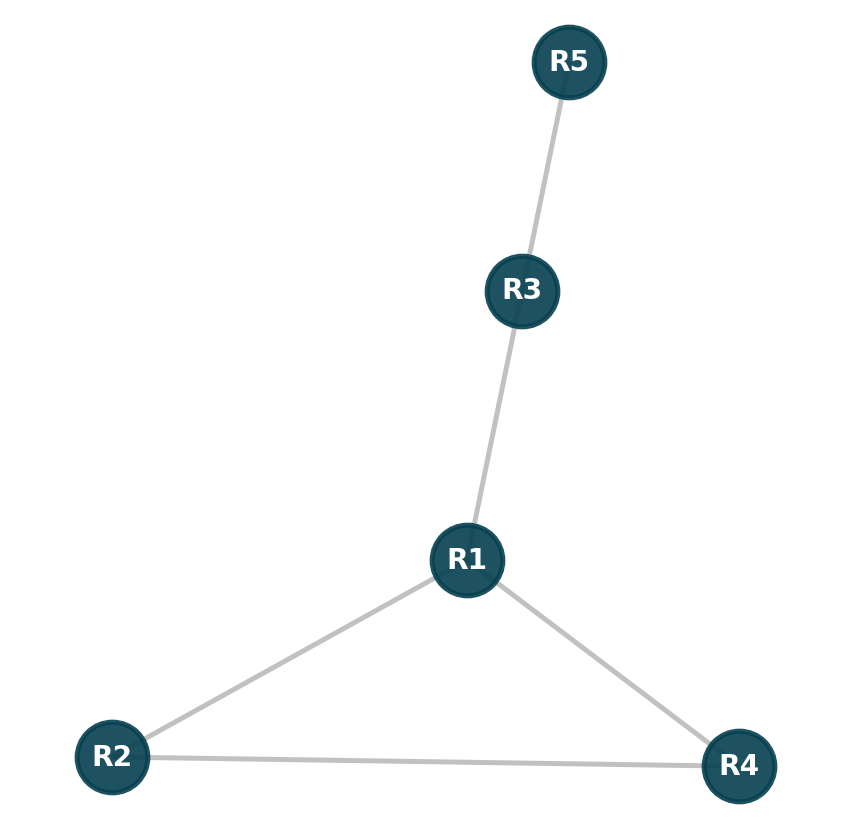

In [6]:
%matplotlib inline

# initialize the figure
plt.figure(figsize=(15, 15), frameon=False)

# compute a layout for the nodes
#pos = nx.nx_agraph.graphviz_layout(G)
pos = nx.spring_layout(G)


# get degree
nx.set_node_attributes(G, nx.degree_centrality(G), "degree")
degrees = [d[1] for d in G.nodes(data="degree")]

# draw nodes
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="#074050", alpha=0.9, linewidths=5).set_edgecolor("#074050")

# draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# draw labels
names_formatted = {n:n for n in G.nodes()}
nx.draw_networkx_labels(G, pos, names_formatted, font_size=28, font_color="#ffffff", font_weight="bold")

# turn off axis
plt.axis('off')

# show plot
plt.show()

We did it! It's not terribly pretty, but it's ours. We'll see more about how to build more interesting plots a bit later.

## Relational data

### The basics

Before we get too far ahead of ourselves, we need to talk a little bit about network data. Typically, you'll see network data represented in one of three formats.

* __Adjacency matrices__ represent relational data as an $n\times n$ matrix, where $n$ is the number of nodes in the network. Each node appears once as a row and once as a column. Cell entries correspond to 0 or 1, indicating whether there is or is not a relationship between node $i$ and node $j$. In the adjacenty matrix below, we see a set of five researchers, with connections appearing among researchers who worked on the same grant together.

|              | R1 | R2 | R3 | R4 | R5 |
|--------------|--------------|--------------|--------------|--------------|--------------|
| R1 | 0            | 1            | 1            | 1            | 0            |
| R2 | 1            | 0            | 0            | 1            | 0            |
| R3 | 1            | 0            | 0            | 0            | 1            |
| R4 | 1            | 1            | 0            | 0            | 0            |
| R5 | 0            | 0            | 1            | 0            | 0            |

* __Edge lists__ essentially represent relational data in a sparse matrix format. Rather than recording all realized (i.e., 1s) and potential (i.e., 0s) relationships, we're only going to record the ones we observe. This format is really helpful for computational purposes when you have a large network.

| a            | b            |
|--------------|--------------|
| R1 | R2 |
| R1 | R3 |
| R1 | R4 |
| R2 | R4 |
| R3 | R5 |

* __Affiliation (or incidence) matrices__ are $n\times m$ matrices used to represent a special kind of network in which we have two kinds of nodes, what we'll call __actors__ ($n$) and __events__ ($m$), with rows indexing the former and columns indexing the latter. 

|              | GA | GB | GC | GD | GE | GF |
|--------------|---------|----------|--------|---------|---------|---------|
| R1 | 1       | 1        | 1      | 1       | 0       |  1      |
| R2 | 1       | 0        | 0      | 1       | 0       |  0      |
| R3 | 0       | 0        | 1      | 0       | 1       |  0      |
| R4 | 0       | 1        | 0      | 1       | 0       |  0      |
| R5 | 0       | 0        | 0      | 0       | 1       |  0      |

### Augmenting the basics

We can also use these basic data formats to store some additional information about the underlying relationships. To keep things simple, we'll focus on adjacency matrices.

* __Edge direction.__ In the example above, we created what is known as an undirected network. We can see this because the adjacency matric is symmetric; we have the same information above and below the diagonal. What this means in substantive terms is that the relationships we observe are symmetric. The edge A-B is identical to the edge B-A; alternatively, we can say that if A is connected to B, then if we have an undirected network, then we know B is connected to A. In a directed network, we can have asymmetry, such that the edge A-B is different from B-A. We see this often in places like citation networks, where papers puplished later in time can cite papers published earlier, but not vice versa. Here is an example of a directed adjacency matrix.

|              | R1 | R2 | R3 | R4 | R5 |
|--------------|--------------|--------------|--------------|--------------|--------------|
| R1 | 0            | 1            | 1            | 0            | 0            |
| R2 | 1            | 0            | 0            | 1            | 0            |
| R3 | 0            | 0            | 0            | 0            | 0            |
| R4 | 1            | 1            | 0            | 0            | 0            |
| R5 | 0            | 0            | 1            | 0            | 0            |

* __Edge weights.__ Up to this point, we've treated edges as binary, meaning they either exist or they do not exist. However, we also sometimes want to incorporate more nuanced information about the relationships we observe, like their strength or type. We can do this easily by adding values to the cells of our adjacency matrix. Note that these values can be either qualitative or quantitative.

|              | R1 | R2 | R3 | R4 | R5 |
|--------------|--------------|------------- |--------------|--------------|--------------|
| R1 | 0.2          | 1.1          | 9.9          | 1.3          | 5.6          |
| R2 | 1.6          | 0.2          | 3.2          | 4.4          | 3.4          |
| R3 | 3.8          | 0.0          | 5.9          | 2.1          | 4.2          |
| R4 | 5.2          | 4.1          | 0.3          | 0.2          | 4.3          |
| R5 | 0.2          | 3.3          | 1.7          | 0.8          | 4.2          |


### Projecting an affiliation matrix
As we discussed above, an affiliation matrix differs from an adjacency matrix or an edge list in that in an affiliation matrix, we actually have two types of nodes. You'll sometimes hear this kind of network referred to as a bipartite (or two-mode) graph or network. Common examples of bipartite graphs include things like scientists collaborating on papers, inventors collaborating on patents, or physicians collaborating on the care of a patient. Intuitively, however, we tend to think about connections among people, rather than people being connected via "events" (e.g., collaborations on papers). Therefore, we'll often want to project a bipartite network to a unipartite representation. We can do this easily in `networkx`.

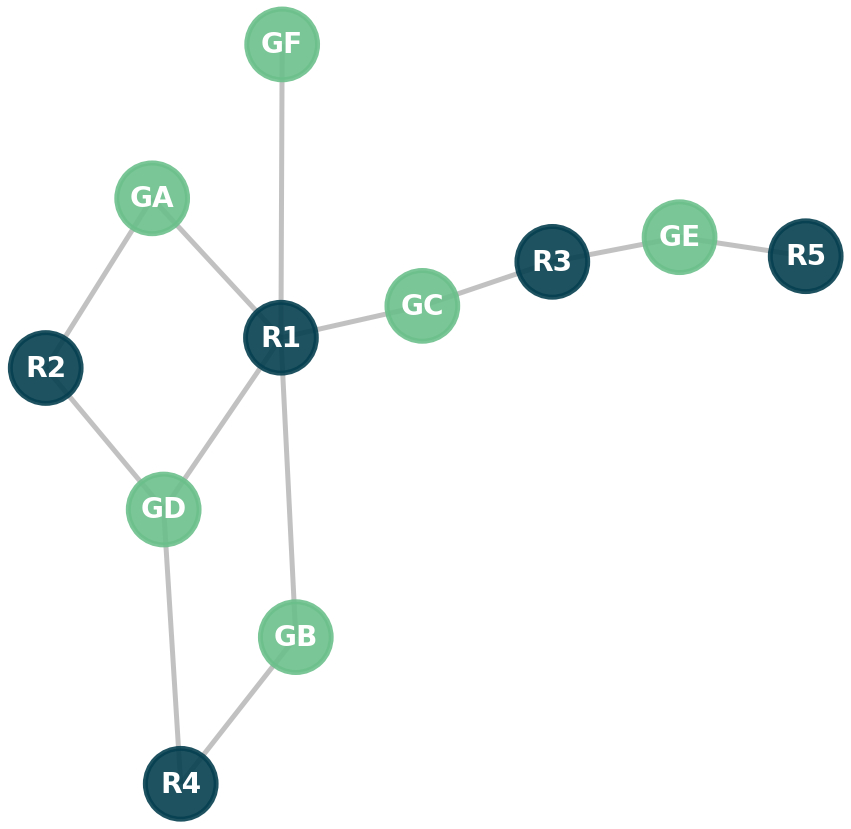

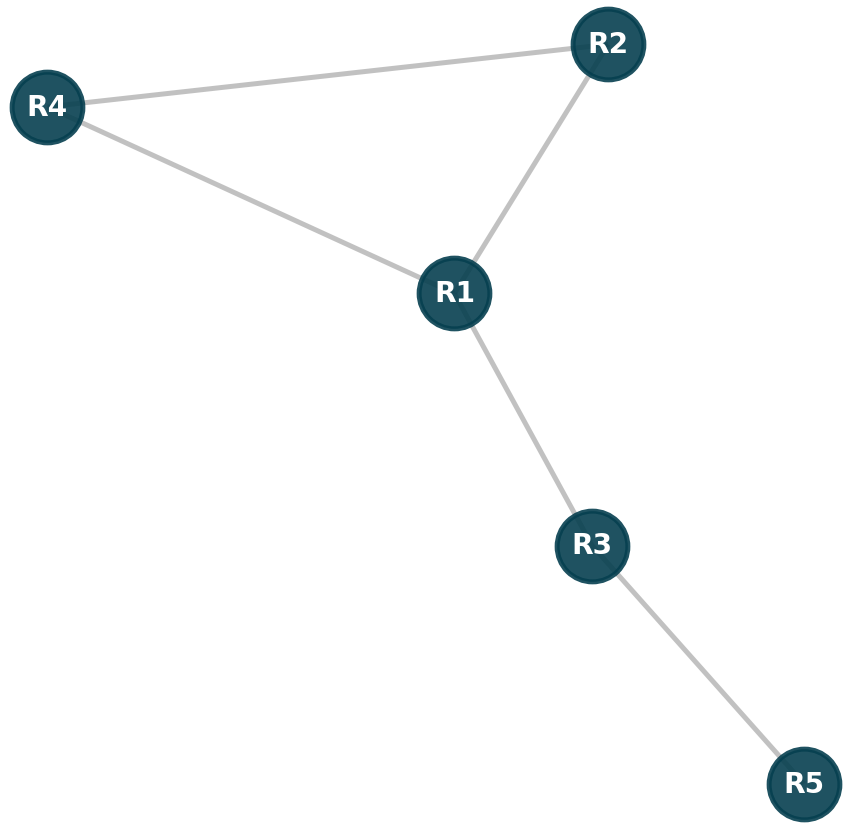

In [5]:
# load bipartite algorithms
from networkx.algorithms import bipartite

# initialize the graph
B = nx.Graph()

# add researcher nodes
B.add_nodes_from(["R1", "R2", "R3", "R4", "R5"], bipartite=0)

# add grant nodes
B.add_nodes_from(["GA", "GB", "GC", "GD", "GE", "GF"], bipartite=1)

# Add edges only between nodes of opposite node sets
bipartite_edges = [("R1", "GA"),
                   ("R1", "GB"),
                   ("R1", "GC"),
                   ("R1", "GD"),
                   ("R1", "GF"),
                   ("R2", "GA"),
                   ("R2", "GD"),
                   ("R3", "GC"),
                   ("R3", "GE"),
                   ("R4", "GB"),
                   ("R4", "GD"),
                   ("R5", "GE")]
B.add_edges_from(bipartite_edges)

# compute a layout for the nodes
pos = nx.nx_agraph.graphviz_layout(B)

# initialize the figure
plt.figure(figsize=(15, 15), frameon=False)

# draw nodes
COLOR_DICT = {0:"#074050",1:"#6cc08b"}
COLOR_LIST = [COLOR_DICT[b["bipartite"]] for n, b in B.nodes(data=True)]
nx.draw_networkx_nodes(B, pos, node_size=5000, node_color=COLOR_LIST, alpha=0.9, linewidths=5).set_edgecolor(COLOR_LIST)

# draw edges
nx.draw_networkx_edges(B, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# draw labels
names_formatted = {n:n for n in B.nodes()}
nx.draw_networkx_labels(B, pos, names_formatted, font_size=28, font_color="#ffffff", font_weight="bold")

# adjust the margins to we can see the labels
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - 0.25,
          x1 + 0.25,
          y0 - 0.25,
          y1 + 0.25))

# turn off axis
plt.axis('off')

# show the plot
plt.show()

# project to get the researcher-to-researcher network
BR = bipartite.generic_weighted_projected_graph(B, [n[0] for n in bipartite_edges])
                  
# compute a layout for the nodes
pos = nx.nx_agraph.graphviz_layout(BR)

# initialize the figure
plt.figure(figsize=(15, 15), frameon=False)
    
# draw nodes
nx.draw_networkx_nodes(BR, pos, node_size=5000, node_color="#074050", alpha=0.9, linewidths=5).set_edgecolor("#074050")

# draw edges
nx.draw_networkx_edges(BR, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# draw labels
names_formatted = {n:n for n in BR.nodes()}
nx.draw_networkx_labels(BR, pos, names_formatted, font_size=28, font_color="#ffffff", font_weight="bold")

# adjust the margins to we can see the labels
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - 0.25,
          x1 + 0.25,
          y0 - 0.25,
          y1 + 0.25))

# turn off axis
plt.axis('off')

# show the plot
plt.show()

## On to real data!

For the rest of this tutorial, we'll learn how to do network analysis in Python by looking at inventor collaboration netwroks at Big 10 Academic Alliance Universities, using data from Patents View. I collected the relevant data from [PatentsView](https://www.patentsview.org), a researcher-oriented interface to the U.S. Patent Office. The details are beyond the scope of this notebook, but if you're curious, you can see the code [here](patentsview_b10aa/download_patentsview_b10aa_network_data.py).

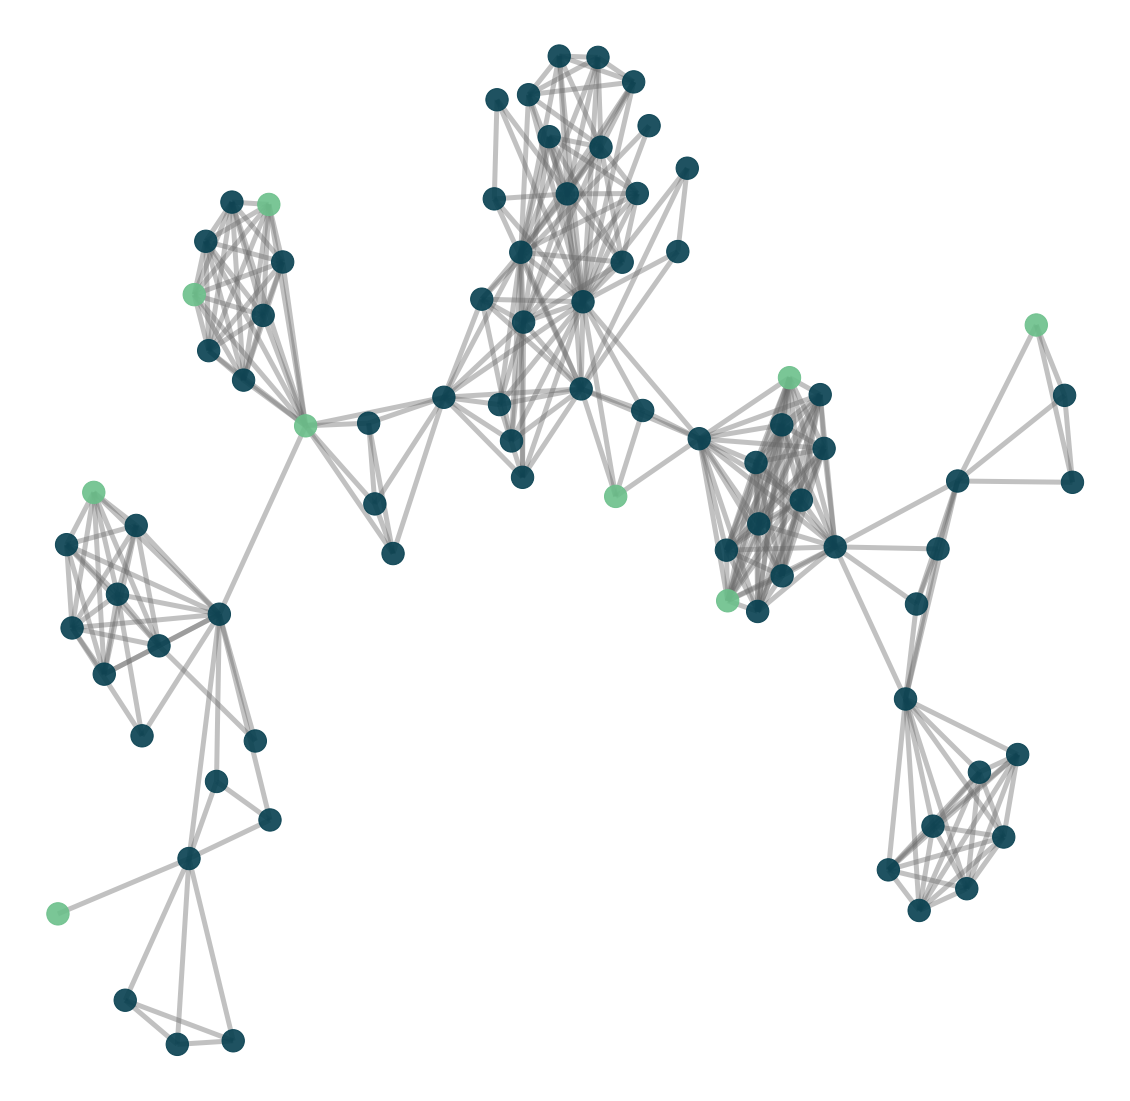

In [6]:
# load networkx
from networkx import nx

# load matplotlib (for plotting)
import matplotlib.pyplot as plt

# load the network data for University of Michigan
G_MI = nx.read_graphml("patentsview_b10aa/network_data/MICHIGAN.graphml")

# pull main component
MC = max(nx.connected_components(G_MI), key=len)
G_MI = G_MI.subgraph(MC).copy()

# compute a layout for the nodes
pos = nx.nx_agraph.graphviz_layout(G_MI)

# initialize the figure
plt.figure(figsize=(20, 20))

# draw nodes
COLOR_DICT = {"male": "#074050","female": "#6cc08b"}
COLOR_LIST = [COLOR_DICT[g["inventor_gender"]] for n, g in G_MI.nodes(data=True)]
nx.draw_networkx_nodes(G_MI, pos, node_size=500, node_color=COLOR_LIST, alpha=0.9)

# draw edges
nx.draw_networkx_edges(G_MI, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# turn off axis
plt.axis("off")

# show the plot
plt.show()

## Characterizing nodes
So now we've got a network. One of the most common kinds of analyses we'll want to do with these sorts of data is look at differences among nodes. For example, we might want to do things like characterize the relative importance (or centrality) of different inventors in the network. Or perhaps we want to examine differences in __how__ various inventors are connected to others. Conducting these kinds of analyses can give us insights (though exacly what those insights mean will depend on the nature and context of our network). Fortunately, `networkx` makes it really easy to conduct these sorts of node level analyses. 

### Centrality
Centrality is probably the most common class of node-level measures we'll want to calculate. Over the years, researchers have developed literally hundredes of measures of centrality. We'll take a look at a few of the most common.

#### Degree centrality 
This measure captures the fraction of nodes to which the focal node is connected.

In [7]:
d = nx.degree_centrality(G_MI)
nx.set_node_attributes(G_MI, d, "degree")

Let's plot the inventor with the highest degree centrality.

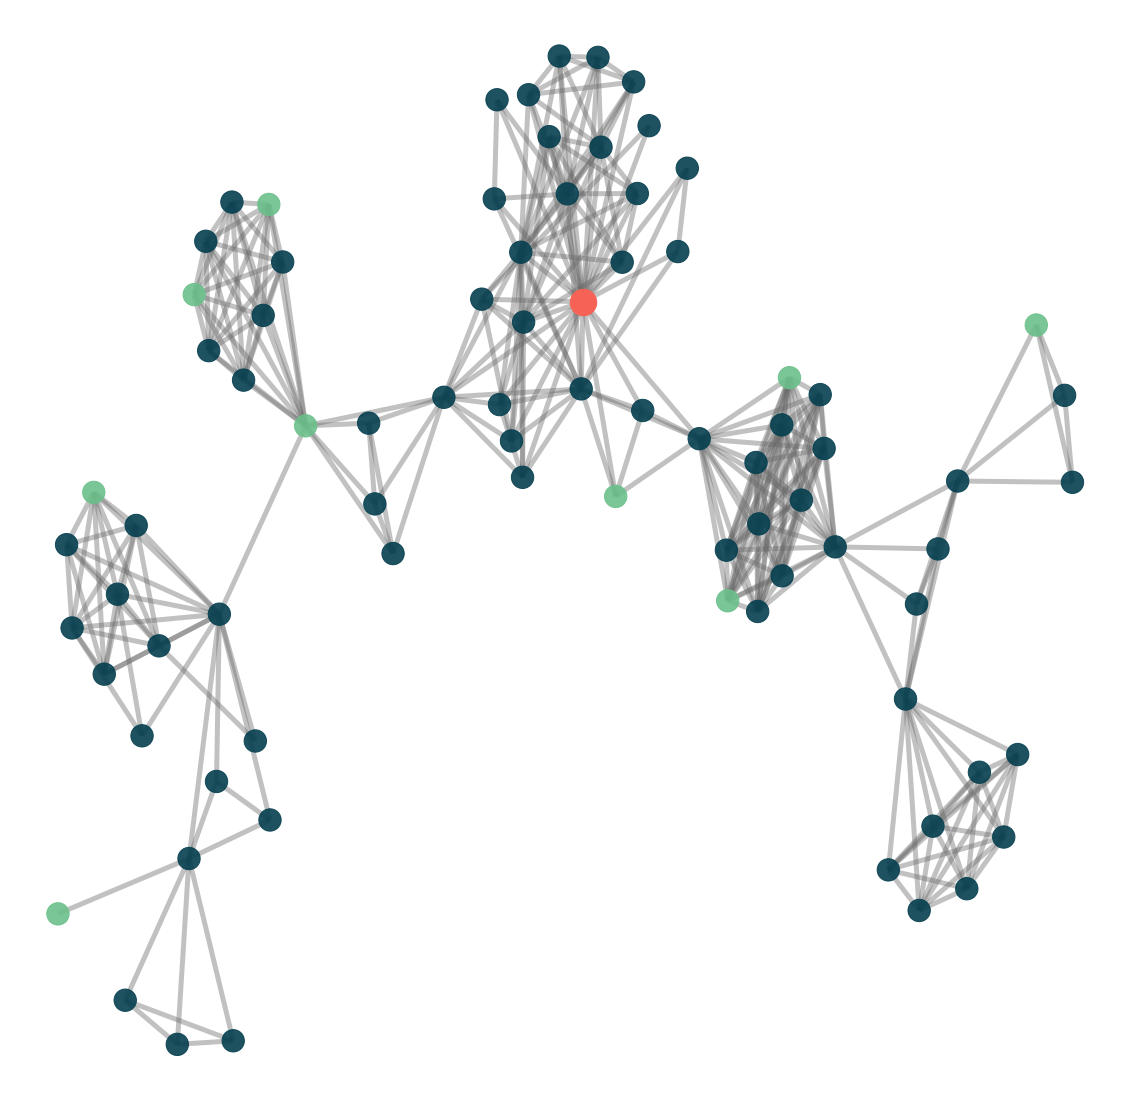

In [8]:
# initialize the figure
plt.figure(figsize=(20, 20))

# get highest degree node
highest_degree_node = sorted(G_MI.nodes(data="degree"), key = lambda x: x[1], reverse=True)[0][0]

# draw nodes
nx.draw_networkx_nodes(G_MI, pos, node_size=500, node_color=COLOR_LIST, alpha=0.9)
nx.draw_networkx_nodes(G_MI, pos, nodelist=[highest_degree_node,], node_size=700, node_color="#f66356", alpha=1)

# draw edges
nx.draw_networkx_edges(G_MI, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# turn off axis
plt.axis("off")

# show the plot
plt.show()

#### Betweenness centrality 
This measure captures the fraction of shortest paths that pass through the focal node.

In [9]:
b = nx.betweenness_centrality(G_MI)
nx.set_node_attributes(G_MI, b, "betweenness")

Let's plot the inventor with the highest betweenness centrality.

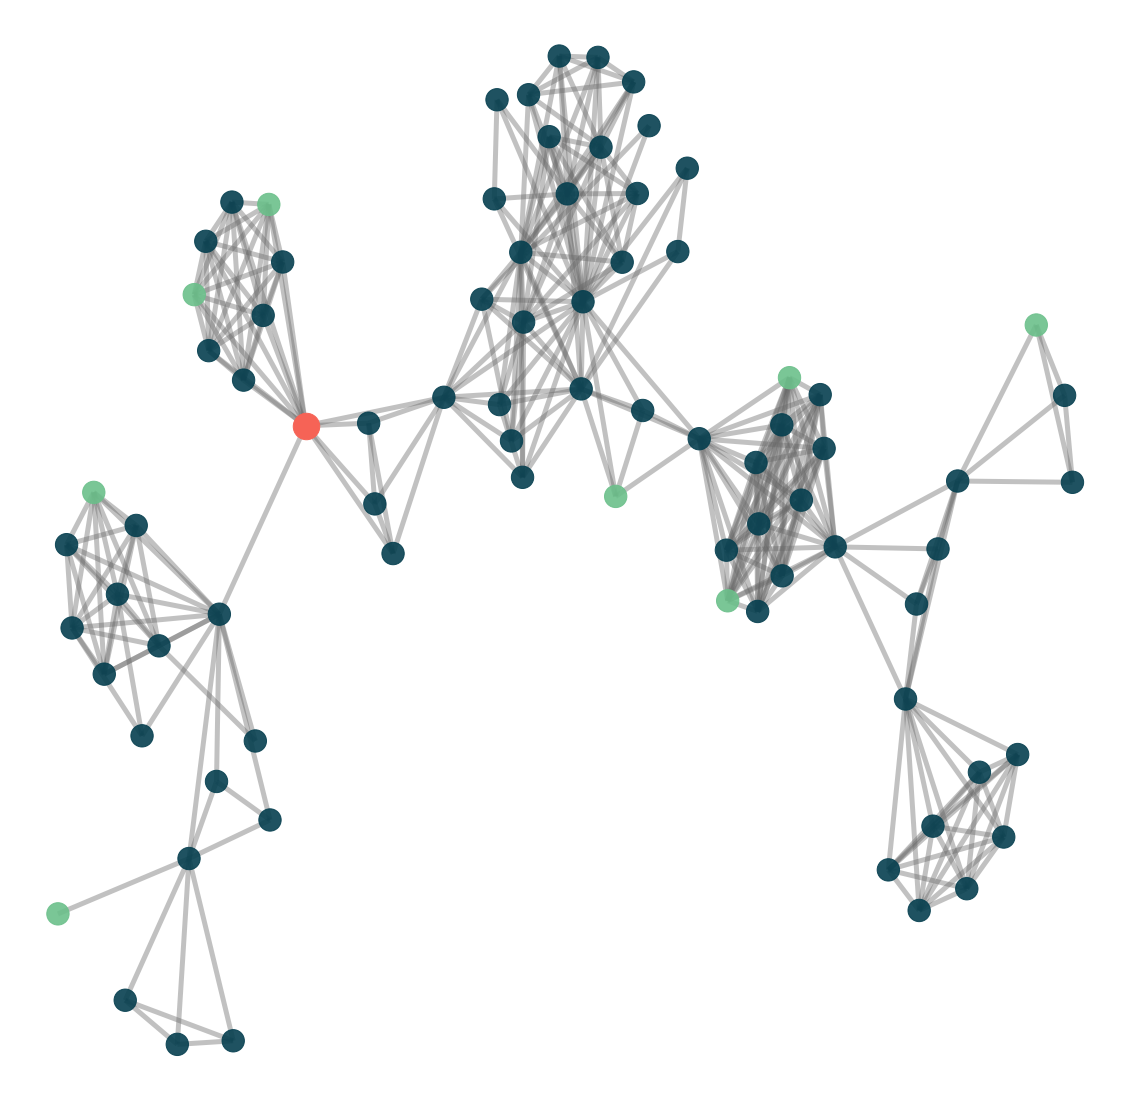

In [10]:
# initialize the figure
plt.figure(figsize=(20, 20))

# get highest betweenness node
highest_betweenness_node = sorted(G_MI.nodes(data="betweenness"), key = lambda x: x[1], reverse=True)[0][0]

# draw nodes
nx.draw_networkx_nodes(G_MI, pos, node_size=500, node_color=COLOR_LIST, alpha=0.9)
nx.draw_networkx_nodes(G_MI, pos, nodelist=[highest_betweenness_node,], node_size=700, node_color="#f66356", alpha=1)

# draw edges
nx.draw_networkx_edges(G_MI, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# turn off axis
plt.axis("off")

# show the plot
plt.show()

#### Closeness centrality 
This measures is the inverse of the sum of the length of the shortest paths from the focal node to others in the network.

In [11]:
c = nx.closeness_centrality(G_MI)
nx.set_node_attributes(G_MI, c, "closeness")

Let's plot the inventor with the highest closeness centrality.

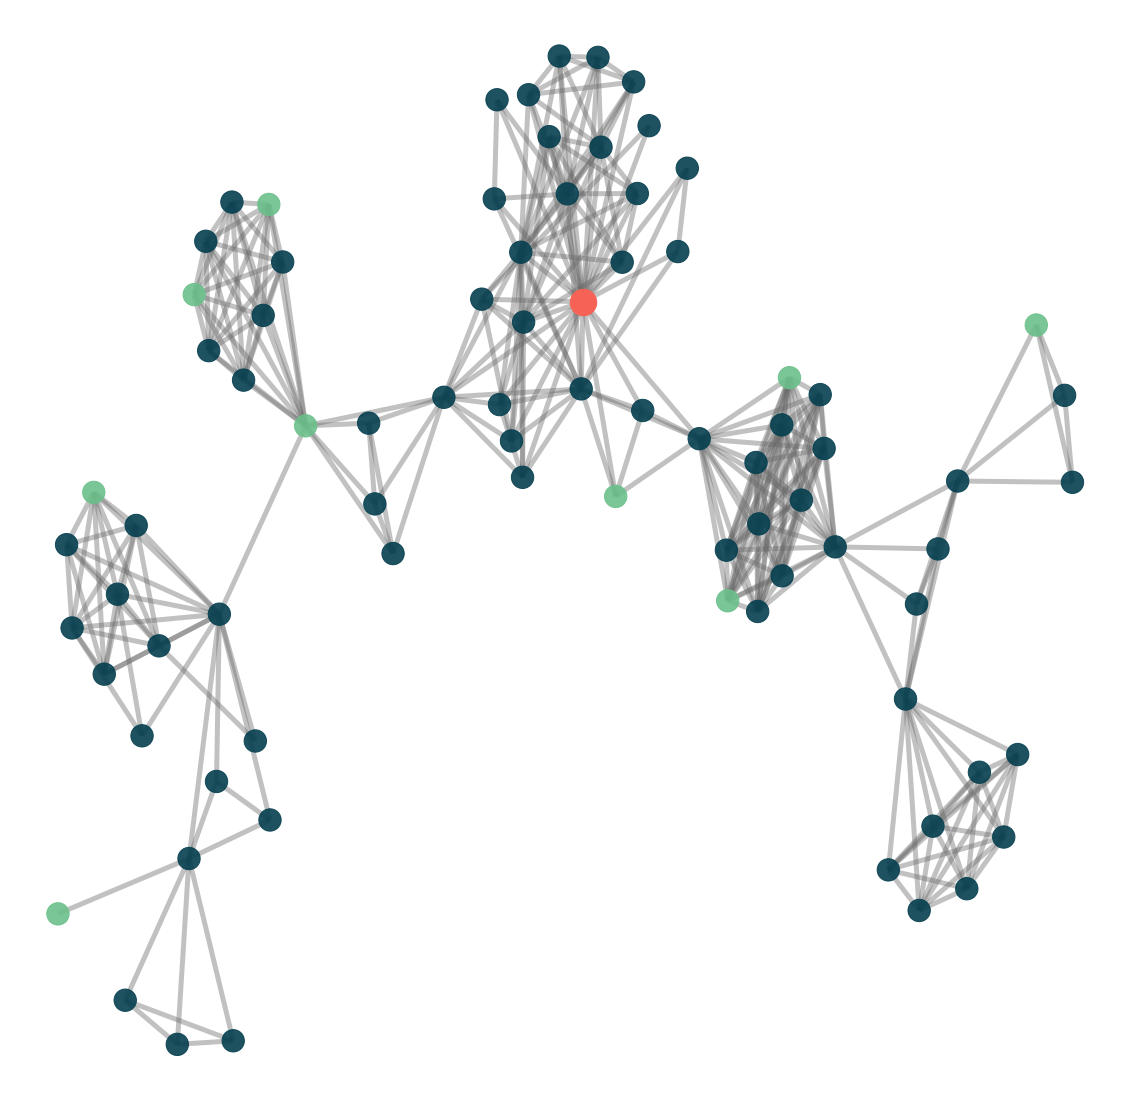

In [12]:
# initialize the figure
plt.figure(figsize=(20, 20))

# get highest closeness node
highest_closeness_node = sorted(G_MI.nodes(data="closeness"), key = lambda x: x[1], reverse=True)[0][0]

# draw nodes
nx.draw_networkx_nodes(G_MI, pos, node_size=500, node_color=COLOR_LIST, alpha=0.9)
nx.draw_networkx_nodes(G_MI, pos, nodelist=[highest_closeness_node,], node_size=700, node_color="#f66356", alpha=1)

# draw edges
nx.draw_networkx_edges(G_MI, pos, alpha=0.4, node_size=0, width=5, edge_color="#666666")

# turn off axis
plt.axis("off")

# show the plot
plt.show()

Let's print out a summary of the three centrality measures.

In [13]:
# print out the results
df = {n:a for n, a in G_MI.nodes(data=True)}
df = pd.DataFrame.from_dict(df, orient="index")
df[["inventor_full_name", "inventor_gender", "degree", "betweenness", "closeness"]].sort_values("degree")

,inventor_full_name,inventor_gender,degree,betweenness,closeness
8043853-2,Eve Kruger,female,0.0125,0.000000,0.182232
7723477-3,Sanjeev H. Satyal,male,0.0250,0.000000,0.216802
6677377-4,Istvan J. Enyedy,male,0.0250,0.000000,0.283688
4908431-2,Alvin H. Schmaier,male,0.0375,0.000000,0.196078
7510877-2,Mark J. Kiel,male,0.0375,0.000000,0.183066
...,...,...,...,...,...
7557251-2,Jianyong Chen,male,0.1875,0.204103,0.373832
7432242-5,Roger K. Sunahara,male,0.2000,0.292405,0.298507
8283368-4,James H. Woods,male,0.2000,0.444304,0.350877
7674787-3,Zaneta Nikolovska-Coleska,male,0.2125,0.040812,0.336134


### Clustering
In network analysis, clustering captures the degree to which we observe, in the network neighborhood of some node A, that if A is connected to B and C that B and C are also connected, a phenomenon known as triadic closure. 

In [14]:
t = nx.clustering(G_MI)
nx.set_node_attributes(G_MI, t, "clustering")

### Constraint
Constraint is a popular measure in social network analysis, originally defined by sociologist Ronald Burt. This measure is typically used to examine the degree to which a node the the network has access to "structural holes," i.e., disconnections among the actors within the network neighborhood of a focal node. Nodes with higher constraint have less access to structural holes, and therefore are thought to have less access to novel information and other resources.

In [15]:
s = nx.constraint(G_MI)
nx.set_node_attributes(G_MI, s, "constraint")

## Characterizing whole networks
There are also many measures available for characterizing whole networks. Rather than telling us about the position of particular actors within a network, these measures give us insight into overall patterns of connectivity. As with the node level measures, there are a few big categories of whole network measures that you'll likely encounter.

### Average path length
This measure captures the expected number of edges (or steps) between two randomly chosen nodes in a network. 

In [16]:
nx.average_shortest_path_length(G_MI)

3.9265432098765434

### Density
Another common network level measure you'll encounter is density, which is defined as the number of edges observed in the network relative to the maximum possible number of edges.

In [17]:
nx.density(G_MI)

0.0978395061728395

### Clustering
We can measure clustering at the whole network level similar to how we can at the node level.

In [18]:
nx.transitivity(G_MI)

0.7364958448753463

## Comparing across whole networks
At a conceptual level, the whole network measures above are kind of interesting, but what do they really mean? How do we interpret them? How do we know if an average path length of X is short or long? One of the best ways is to compare across networks. As a concluding exercise, let's try to do that for the universities.

In [19]:
import glob

# create a dictionary to hold our networks
university_networks = {}

# load the networks
for graphml_file in glob.glob("patentsview_b10aa/network_data/*.graphml"):  
  _G = nx.read_graphml(graphml_file)

  # pull main component
  _MC = max(nx.connected_components(_G), key=len)
  _G = _G.subgraph(_MC).copy()

  # add to dictionary
  university_networks[_G.graph["name"]] = _G

# loop over the graphs and print out some measures
df = {}
for name, university_network in university_networks.items():  
  df[name] = {"average_shortest_path_length": nx.average_shortest_path_length(university_network), 
              "density": nx.density(university_network), 
              "transitivity": nx.transitivity(university_network), 
              "number_of_nodes": nx.number_of_nodes(university_network), 
              "number_of_edges": nx.number_of_edges(university_network)}

df = pd.DataFrame.from_dict(df, orient="index")
df.sort_values("density")

,average_shortest_path_length,density,transitivity,number_of_nodes,number_of_edges
WISCONSIN,3.710448,0.036484,0.432346,135,330
NORTHWESTERN,3.382808,0.048031,0.257176,99,233
UIUC,4.187879,0.076094,0.473968,55,113
MICHIGAN,3.926543,0.097840,0.736496,81,317
IOWA,2.876894,0.125000,0.475073,33,66
OHIO_STATE,2.040000,0.226667,0.579832,25,68
MICHIGAN_STATE,1.866667,0.228571,0.436893,21,48
PENN_STATE,2.504762,0.266667,0.820000,21,56
RUTGERS,1.913043,0.308300,0.672000,23,78
PURDUE,1.926407,0.333333,0.613288,22,77


Finally, let's plot the networks.

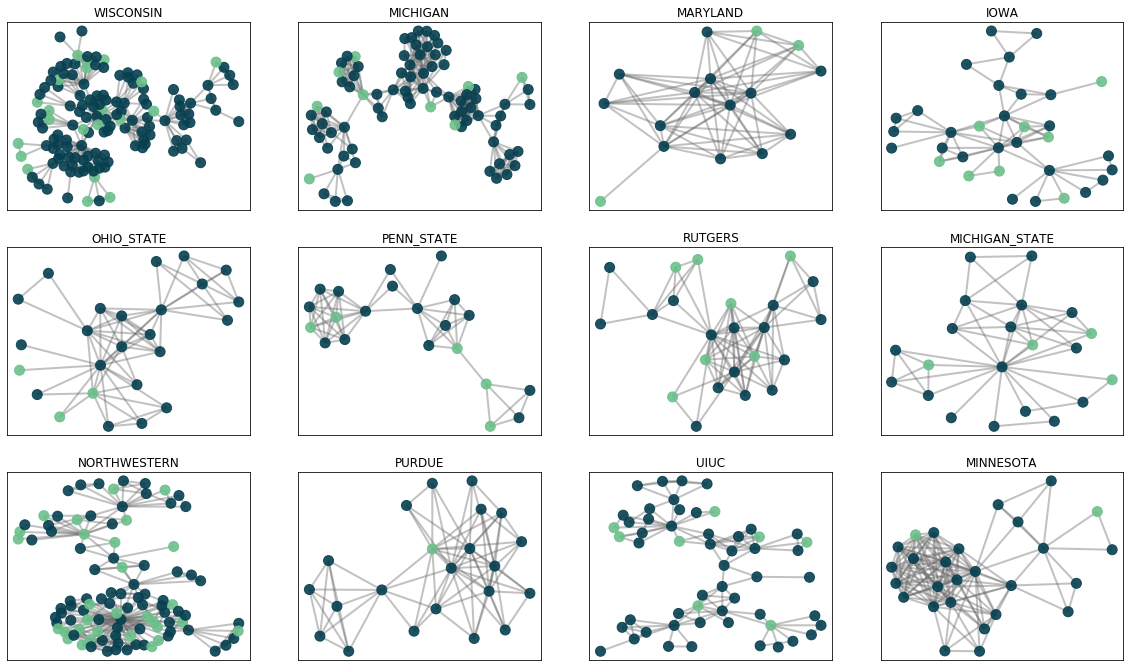

In [20]:
# initialize the figure
plt.figure(figsize=(20, 20))

# loop over the universities
i = 0
for assignee_id, university_network in university_networks.items():  
  
  # skip nebraska and indiana
  if university_network.graph["name"] in ("NEBRASKA", "INDIANA"):
    continue
    
  # compute a layout for the nodes
  pos = nx.nx_agraph.graphviz_layout(university_network)
  
  # create a subplot
  plt.subplot(5,4,i+1)

  # add the title
  plt.gca().set_title(university_network.graph["name"])

  # draw nodes
  COLOR_DICT = {"male": "#074050","female": "#6cc08b"}
  COLOR_LIST = [COLOR_DICT[g["inventor_gender"]] for n, g in university_network.nodes(data=True)]
  nx.draw_networkx_nodes(university_network, pos, node_size=100, node_color=COLOR_LIST, alpha=0.9)

  # draw edges
  nx.draw_networkx_edges(university_network, pos, alpha=0.4, node_size=0, width=2, edge_color="#666666")

  # increment i
  i += 1

# show the plot
plt.show()

### Visualizing network properties
Finally, we can visualize some basic network properties.

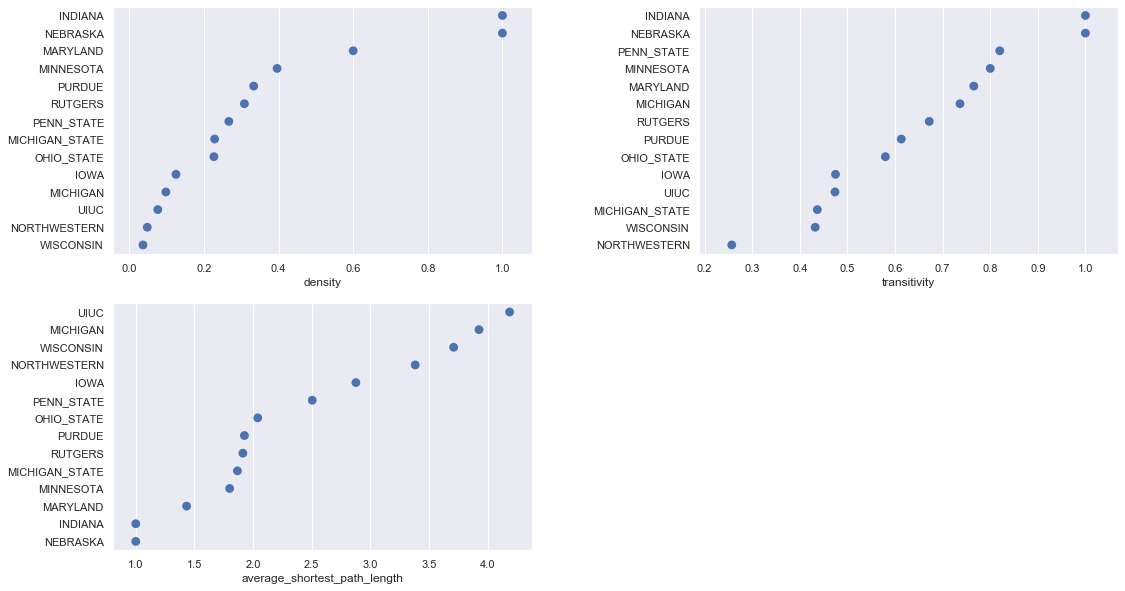

In [21]:
# load some libraries
import seaborn as sns

# pull some data to plot
plot_data = [(name, 
              nx.density(university_network), 
              nx.transitivity(university_network), 
              nx.average_shortest_path_length(university_network)) for name, university_network in university_networks.items()]

# convert to pandas data frame
plot_data = pd.DataFrame(plot_data, columns=["name",
                                             "density",
                                             "transitivity",
                                             "average_shortest_path_length"])

# set theme for plot
sns.set(style="darkgrid")

# plot
plt.figure(figsize=(18, 10))

# subplot for density
plt.subplot(2,2,1)
ax = sns.pointplot(x="density", y="name", join=False, data=plot_data.sort_values(by=["density"], ascending=False))
ax.yaxis.set_label_text("")

# subplot for transitivity
plt.subplot(2,2,2)
ax = sns.pointplot(x="transitivity", y="name", join=False, data=plot_data.sort_values(by=["transitivity"], ascending=False))
ax.yaxis.set_label_text("")

# subplot for number_of_nodes
plt.subplot(2,2,3)
ax = sns.pointplot(x="average_shortest_path_length", y="name", join=False, data=plot_data.sort_values(by=["average_shortest_path_length"], ascending=False))
ax.yaxis.set_label_text("")

# increase spacing between subplots
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()

## Next steps

If you want to learn more about how to do network analysis in Python, the best advice I can give is to start rolling up your sleves and getting your hands dirty. Look around for data that you find interesting and that's relevant to your research. Ask questions that are not limited by what you know how to do. Try to break the problem down step by step. Everyone's different, but if you're like me, slogging through a programming book will not be the most exciting way forward.